# Import libraries needed

In [106]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.4)

import warnings
warnings.filterwarnings('ignore')

# Data

## Loading data and getting the shape

In [107]:
data = pd.read_csv('nutrition.csv')
data.shape

(8789, 77)

**The dataset has 8789 rows and 77 columns.**

In [108]:
data.head()

,Unnamed: 0,name,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,folic_acid,niacin,pantothenic_acid,riboflavin,thiamin,vitamin_a,vitamin_a_rae,carotene_alpha,carotene_beta,cryptoxanthin_beta,lutein_zeaxanthin,lucopene,vitamin_b12,vitamin_b6,vitamin_c,vitamin_d,vitamin_e,tocopherol_alpha,vitamin_k,calcium,copper,irom,magnesium,manganese,phosphorous,potassium,selenium,zink,protein,alanine,arginine,aspartic_acid,cystine,glutamic_acid,glycine,histidine,hydroxyproline,isoleucine,leucine,lysine,methionine,phenylalanine,proline,serine,threonine,tryptophan,tyrosine,valine,carbohydrate,fiber,sugars,fructose,galactose,glucose,lactose,maltose,sucrose,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
0,0,Cornstarch,100 g,381,0.1g,NaN,0,9.00 mg,0.4 mg,0.00 mcg,0.00 mcg,0.000 mg,0.000 mg,0.000 mg,0.000 mg,0.00 IU,0.00 mcg,0.00 mcg,0.00 mcg,0.00 mcg,0.00 mcg,0,0.00 mcg,0.000 mg,0.0 mg,0.00 IU,0.00 mg,0.00 mg,0.0 mcg,2.00 mg,0.050 mg,0.47 mg,3.00 mg,0.053 mg,13.00 mg,3.00 mg,2.8 mcg,0.06 mg,0.26 g,0.019 g,0.012 g,0.020 g,0.006 g,0.053 g,0.009 g,0.008 g,0,0.010 g,0.036 g,0.006 g,0.006 g,0.013 g,0.024 g,0.012 g,0.009 g,0.001 g,0.010 g,0.014 g,91.27 g,0.9 g,0.00 g,0,0,0,0,0,0,0.05 g,0.009 g,0.016 g,0.025 g,0.00 mg,0.0 g,0.09 g,0.00 mg,0.00 mg,8.32 g
1,1,"Nuts, pecans",100 g,691,72g,6.2g,0,0.00 mg,40.5 mg,22.00 mcg,0.00 mcg,1.167 mg,0.863 mg,0.130 mg,0.660 mg,56.00 IU,3.00 mcg,0.00 mcg,29.00 mcg,9.00 mcg,17.00 mcg,0,0.00 mcg,0.210 mg,1.1 mg,0.00 IU,1.40 mg,1.40 mg,3.5 mcg,70.00 mg,1.200 mg,2.53 mg,121.00 mg,4.500 mg,277.00 mg,410.00 mg,3.8 mcg,4.53 mg,9.17 g,0.397 g,1.177 g,0.929 g,0.152 g,1.829 g,0.453 g,0.262 g,0,0.336 g,0.598 g,0.287 g,0.183 g,0.426 g,0.363 g,0.474 g,0.306 g,0.093 g,0.215 g,0.411 g,13.86 g,9.6 g,3.97 g,0.04 g,0,0.04 g,0.00 g,0.00 g,3.90 g,71.97 g,6.180 g,40.801 g,21.614 g,0.00 mg,0.0 g,1.49 g,0.00 mg,0.00 mg,3.52 g
2,2,"Eggplant, raw",100 g,25,0.2g,NaN,0,2.00 mg,6.9 mg,22.00 mcg,0.00 mcg,0.649 mg,0.281 mg,0.037 mg,0.039 mg,23.00 IU,1.00 mcg,0.00 mcg,14.00 mcg,0.00 mcg,36.00 mcg,0,0.00 mcg,0.084 mg,2.2 mg,0.00 IU,0.30 mg,0.30 mg,3.5 mcg,9.00 mg,0.081 mg,0.23 mg,14.00 mg,0.232 mg,24.00 mg,229.00 mg,0.3 mcg,0.16 mg,0.98 g,0.051 g,0.057 g,0.164 g,0.006 g,0.186 g,0.041 g,0.023 g,0,0.045 g,0.064 g,0.047 g,0.011 g,0.043 g,0.043 g,0.042 g,0.037 g,0.009 g,0.027 g,0.053 g,5.88 g,3.0 g,3.53 g,1.54 g,0,1.58 g,0,0,0.26 g,0.18 g,0.034 g,0.016 g,0.076 g,0.00 mg,0.0 g,0.66 g,0.00 mg,0.00 mg,92.30 g
3,3,"Teff, uncooked",100 g,367,2.4g,0.4g,0,12.00 mg,13.1 mg,0,0,3.363 mg,0.942 mg,0.270 mg,0.390 mg,9.00 IU,0.00 mcg,0.00 mcg,5.00 mcg,0.00 mcg,66.00 mcg,0,0,0.482 mg,0,0,0.08 mg,0.08 mg,1.9 mcg,180.00 mg,0.810 mg,7.63 mg,184.00 mg,9.240 mg,429.00 mg,427.00 mg,4.4 mcg,3.63 mg,13.30 g,0.747 g,0.517 g,0.820 g,0.236 g,3.349 g,0.477 g,0.301 g,0,0.501 g,1.068 g,0.376 g,0.428 g,0.698 g,0.664 g,0.622 g,0.510 g,0.139 g,0.458 g,0.686 g,73.13 g,8.0 g,1.84 g,0.47 g,0.00 g,0.73 g,0.00 g,0.01 g,0.62 g,2.38 g,0.449 g,0.589 g,1.071 g,0,0,2.37 g,0,0,8.82 g
4,4,"Sherbet, orange",100 g,144,2g,1.2g,1mg,46.00 mg,7.7 mg,4.00 mcg,0.00 mcg,0.063 mg,0.224 mg,0.097 mg,0.027 mg,46.00 IU,12.00 mcg,0.00 mcg,1.00 mcg,5.00 mcg,7.00 mcg,0,0.13 mcg,0.023 mg,2.3 mg,0.00 IU,0.01 mg,0.01 mg,0.0 mcg,54.00 mg,0.028 mg,0.14 mg,8.00 mg,0.011 mg,40.00 mg,96.00 mg,1.5 mcg,0.48 mg,1.10 g,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30.40 g,1.3 g,24.32 g,0,0,0,0,0,0,2.00 g,1.160 g,0.530 g,0.080 g,1.00 mg,0.0 g,0.40 g,0.00 mg,0.00 mg,66.10 g


## Missing Values

In [109]:
print('NUMBER OF MISSING VALUES FOR EACH FEATURE:')
print(data.isna().sum())

NUMBER OF MISSING VALUES FOR EACH FEATURE:
Unnamed: 0                        0
name                              0
serving_size                      0
calories                          0
total_fat                         0
saturated_fat                  1590
cholesterol                       0
sodium                            0
choline                           0
folate                            0
folic_acid                        0
niacin                            0
pantothenic_acid                  0
riboflavin                        0
thiamin                           0
vitamin_a                         0
vitamin_a_rae                     0
carotene_alpha                    0
carotene_beta                     0
cryptoxanthin_beta                0
lutein_zeaxanthin                 0
lucopene                          0
vitamin_b12                       0
vitamin_b6                        0
vitamin_c                         0
vitamin_d                         0
vitamin_e            

**Only the saturated fat column has missing values.**

## Duplicates

In [110]:
print(f'Duplicates in the dataset: {data.duplicated().sum()}')
print(f'Percentage of duplicates: {data.duplicated().sum()/len(data)}%')

Duplicates in the dataset: 0
Percentage of duplicates: 0.0%


**There are no duplicates in the dataset.**

## Cardinality

In [111]:
data.nunique()

Unnamed: 0                     8789
name                           8789
serving_size                      1
calories                        671
total_fat                       176
saturated_fat                   156
cholesterol                     313
sodium                         1245
choline                        1197
folate                          374
folic_acid                      259
niacin                         3818
pantothenic_acid               1479
riboflavin                      838
thiamin                         914
vitamin_a                      1341
vitamin_a_rae                   566
carotene_alpha                  215
carotene_beta                   582
cryptoxanthin_beta              144
lutein_zeaxanthin               541
lucopene                          1
vitamin_b12                     694
vitamin_b6                      988
vitamin_c                       562
vitamin_d                       242
vitamin_e                       564
tocopherol_alpha            

Serving size and lucopene has only one value. Upon checking  the head of the dataset, the serving size for all is 100 grams and the lucopene is always zero. I'll consider dropping lucopene since it is the same in all rows and may not provide useful information. All the other features have numerous unique values and upon checking the head of the dataset, all of them are continuous values.

## Data Types

In [112]:
data.dtypes

Unnamed: 0                      int64
name                           object
serving_size                   object
calories                        int64
total_fat                      object
saturated_fat                  object
cholesterol                    object
sodium                         object
choline                        object
folate                         object
folic_acid                     object
niacin                         object
pantothenic_acid               object
riboflavin                     object
thiamin                        object
vitamin_a                      object
vitamin_a_rae                  object
carotene_alpha                 object
carotene_beta                  object
cryptoxanthin_beta             object
lutein_zeaxanthin              object
lucopene                        int64
vitamin_b12                    object
vitamin_b6                     object
vitamin_c                      object
vitamin_d                      object
vitamin_e   

Only the calories and lucopene features have a numerical datatype. The other features fell under the object data type because of their labels. I should remove those labels while maintaning the number.

# Data Cleaning

## Removing the labels

**Checking once again the head of the dataset**

In [113]:
data.head()

,Unnamed: 0,name,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,folic_acid,niacin,pantothenic_acid,riboflavin,thiamin,vitamin_a,vitamin_a_rae,carotene_alpha,carotene_beta,cryptoxanthin_beta,lutein_zeaxanthin,lucopene,vitamin_b12,vitamin_b6,vitamin_c,vitamin_d,vitamin_e,tocopherol_alpha,vitamin_k,calcium,copper,irom,magnesium,manganese,phosphorous,potassium,selenium,zink,protein,alanine,arginine,aspartic_acid,cystine,glutamic_acid,glycine,histidine,hydroxyproline,isoleucine,leucine,lysine,methionine,phenylalanine,proline,serine,threonine,tryptophan,tyrosine,valine,carbohydrate,fiber,sugars,fructose,galactose,glucose,lactose,maltose,sucrose,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
0,0,Cornstarch,100 g,381,0.1g,NaN,0,9.00 mg,0.4 mg,0.00 mcg,0.00 mcg,0.000 mg,0.000 mg,0.000 mg,0.000 mg,0.00 IU,0.00 mcg,0.00 mcg,0.00 mcg,0.00 mcg,0.00 mcg,0,0.00 mcg,0.000 mg,0.0 mg,0.00 IU,0.00 mg,0.00 mg,0.0 mcg,2.00 mg,0.050 mg,0.47 mg,3.00 mg,0.053 mg,13.00 mg,3.00 mg,2.8 mcg,0.06 mg,0.26 g,0.019 g,0.012 g,0.020 g,0.006 g,0.053 g,0.009 g,0.008 g,0,0.010 g,0.036 g,0.006 g,0.006 g,0.013 g,0.024 g,0.012 g,0.009 g,0.001 g,0.010 g,0.014 g,91.27 g,0.9 g,0.00 g,0,0,0,0,0,0,0.05 g,0.009 g,0.016 g,0.025 g,0.00 mg,0.0 g,0.09 g,0.00 mg,0.00 mg,8.32 g
1,1,"Nuts, pecans",100 g,691,72g,6.2g,0,0.00 mg,40.5 mg,22.00 mcg,0.00 mcg,1.167 mg,0.863 mg,0.130 mg,0.660 mg,56.00 IU,3.00 mcg,0.00 mcg,29.00 mcg,9.00 mcg,17.00 mcg,0,0.00 mcg,0.210 mg,1.1 mg,0.00 IU,1.40 mg,1.40 mg,3.5 mcg,70.00 mg,1.200 mg,2.53 mg,121.00 mg,4.500 mg,277.00 mg,410.00 mg,3.8 mcg,4.53 mg,9.17 g,0.397 g,1.177 g,0.929 g,0.152 g,1.829 g,0.453 g,0.262 g,0,0.336 g,0.598 g,0.287 g,0.183 g,0.426 g,0.363 g,0.474 g,0.306 g,0.093 g,0.215 g,0.411 g,13.86 g,9.6 g,3.97 g,0.04 g,0,0.04 g,0.00 g,0.00 g,3.90 g,71.97 g,6.180 g,40.801 g,21.614 g,0.00 mg,0.0 g,1.49 g,0.00 mg,0.00 mg,3.52 g
2,2,"Eggplant, raw",100 g,25,0.2g,NaN,0,2.00 mg,6.9 mg,22.00 mcg,0.00 mcg,0.649 mg,0.281 mg,0.037 mg,0.039 mg,23.00 IU,1.00 mcg,0.00 mcg,14.00 mcg,0.00 mcg,36.00 mcg,0,0.00 mcg,0.084 mg,2.2 mg,0.00 IU,0.30 mg,0.30 mg,3.5 mcg,9.00 mg,0.081 mg,0.23 mg,14.00 mg,0.232 mg,24.00 mg,229.00 mg,0.3 mcg,0.16 mg,0.98 g,0.051 g,0.057 g,0.164 g,0.006 g,0.186 g,0.041 g,0.023 g,0,0.045 g,0.064 g,0.047 g,0.011 g,0.043 g,0.043 g,0.042 g,0.037 g,0.009 g,0.027 g,0.053 g,5.88 g,3.0 g,3.53 g,1.54 g,0,1.58 g,0,0,0.26 g,0.18 g,0.034 g,0.016 g,0.076 g,0.00 mg,0.0 g,0.66 g,0.00 mg,0.00 mg,92.30 g
3,3,"Teff, uncooked",100 g,367,2.4g,0.4g,0,12.00 mg,13.1 mg,0,0,3.363 mg,0.942 mg,0.270 mg,0.390 mg,9.00 IU,0.00 mcg,0.00 mcg,5.00 mcg,0.00 mcg,66.00 mcg,0,0,0.482 mg,0,0,0.08 mg,0.08 mg,1.9 mcg,180.00 mg,0.810 mg,7.63 mg,184.00 mg,9.240 mg,429.00 mg,427.00 mg,4.4 mcg,3.63 mg,13.30 g,0.747 g,0.517 g,0.820 g,0.236 g,3.349 g,0.477 g,0.301 g,0,0.501 g,1.068 g,0.376 g,0.428 g,0.698 g,0.664 g,0.622 g,0.510 g,0.139 g,0.458 g,0.686 g,73.13 g,8.0 g,1.84 g,0.47 g,0.00 g,0.73 g,0.00 g,0.01 g,0.62 g,2.38 g,0.449 g,0.589 g,1.071 g,0,0,2.37 g,0,0,8.82 g
4,4,"Sherbet, orange",100 g,144,2g,1.2g,1mg,46.00 mg,7.7 mg,4.00 mcg,0.00 mcg,0.063 mg,0.224 mg,0.097 mg,0.027 mg,46.00 IU,12.00 mcg,0.00 mcg,1.00 mcg,5.00 mcg,7.00 mcg,0,0.13 mcg,0.023 mg,2.3 mg,0.00 IU,0.01 mg,0.01 mg,0.0 mcg,54.00 mg,0.028 mg,0.14 mg,8.00 mg,0.011 mg,40.00 mg,96.00 mg,1.5 mcg,0.48 mg,1.10 g,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30.40 g,1.3 g,24.32 g,0,0,0,0,0,0,2.00 g,1.160 g,0.530 g,0.080 g,1.00 mg,0.0 g,0.40 g,0.00 mg,0.00 mg,66.10 g


Now making a function to remove labels and using for loop to apply it to all features.

In [114]:
numbers = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '.']

def remove_labels(x):
    if isinstance(x, str):
        for char in range(len(x)):
            if x[char] not in numbers:
                return float(x[0:char:1])
    else: 
        return x

for i in data.columns[2:]:
  data[i] = data[i].apply(remove_labels)

Filling in the missing values.

In [115]:
data[:] = data[:].fillna(0)

Checking again the head of the dataset.

In [116]:
data.head()

,Unnamed: 0,name,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,folic_acid,niacin,pantothenic_acid,riboflavin,thiamin,vitamin_a,vitamin_a_rae,carotene_alpha,carotene_beta,cryptoxanthin_beta,lutein_zeaxanthin,lucopene,vitamin_b12,vitamin_b6,vitamin_c,vitamin_d,vitamin_e,tocopherol_alpha,vitamin_k,calcium,copper,irom,magnesium,manganese,phosphorous,potassium,selenium,zink,protein,alanine,arginine,aspartic_acid,cystine,glutamic_acid,glycine,histidine,hydroxyproline,isoleucine,leucine,lysine,methionine,phenylalanine,proline,serine,threonine,tryptophan,tyrosine,valine,carbohydrate,fiber,sugars,fructose,galactose,glucose,lactose,maltose,sucrose,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
0,0,Cornstarch,100.0,381,0.1,0.0,0.0,9.0,0.4,0.0,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0,0.00,0.000,0.0,0.0,0.00,0.00,0.0,2.0,0.050,0.47,3.0,0.053,13.0,3.0,2.8,0.06,0.26,0.019,0.012,0.020,0.006,0.053,0.009,0.008,0.0,0.010,0.036,0.006,0.006,0.013,0.024,0.012,0.009,0.001,0.010,0.014,91.27,0.9,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.05,0.009,0.016,0.025,0.0,0.0,0.09,0.0,0.0,8.32
1,1,"Nuts, pecans",100.0,691,72.0,6.2,0.0,0.0,40.5,22.0,0.0,1.167,0.863,0.130,0.660,56.0,3.0,0.0,29.0,9.0,17.0,0,0.00,0.210,1.1,0.0,1.40,1.40,3.5,70.0,1.200,2.53,121.0,4.500,277.0,410.0,3.8,4.53,9.17,0.397,1.177,0.929,0.152,1.829,0.453,0.262,0.0,0.336,0.598,0.287,0.183,0.426,0.363,0.474,0.306,0.093,0.215,0.411,13.86,9.6,3.97,0.04,0.0,0.04,0.0,0.00,3.90,71.97,6.180,40.801,21.614,0.0,0.0,1.49,0.0,0.0,3.52
2,2,"Eggplant, raw",100.0,25,0.2,0.0,0.0,2.0,6.9,22.0,0.0,0.649,0.281,0.037,0.039,23.0,1.0,0.0,14.0,0.0,36.0,0,0.00,0.084,2.2,0.0,0.30,0.30,3.5,9.0,0.081,0.23,14.0,0.232,24.0,229.0,0.3,0.16,0.98,0.051,0.057,0.164,0.006,0.186,0.041,0.023,0.0,0.045,0.064,0.047,0.011,0.043,0.043,0.042,0.037,0.009,0.027,0.053,5.88,3.0,3.53,1.54,0.0,1.58,0.0,0.00,0.26,0.18,0.034,0.016,0.076,0.0,0.0,0.66,0.0,0.0,92.30
3,3,"Teff, uncooked",100.0,367,2.4,0.4,0.0,12.0,13.1,0.0,0.0,3.363,0.942,0.270,0.390,9.0,0.0,0.0,5.0,0.0,66.0,0,0.00,0.482,0.0,0.0,0.08,0.08,1.9,180.0,0.810,7.63,184.0,9.240,429.0,427.0,4.4,3.63,13.30,0.747,0.517,0.820,0.236,3.349,0.477,0.301,0.0,0.501,1.068,0.376,0.428,0.698,0.664,0.622,0.510,0.139,0.458,0.686,73.13,8.0,1.84,0.47,0.0,0.73,0.0,0.01,0.62,2.38,0.449,0.589,1.071,0.0,0.0,2.37,0.0,0.0,8.82
4,4,"Sherbet, orange",100.0,144,2.0,1.2,1.0,46.0,7.7,4.0,0.0,0.063,0.224,0.097,0.027,46.0,12.0,0.0,1.0,5.0,7.0,0,0.13,0.023,2.3,0.0,0.01,0.01,0.0,54.0,0.028,0.14,8.0,0.011,40.0,96.0,1.5,0.48,1.10,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,30.40,1.3,24.32,0.00,0.0,0.00,0.0,0.00,0.00,2.00,1.160,0.530,0.080,1.0,0.0,0.40,0.0,0.0,66.10


**The dataset is now clean and can be used for other purposes.**

# Task 1

**Predict calories using fat, cholesterol, and carbohydrate by using linear regression with at least 80% accuracy**

Copying the dataset and dropping lucopene because it only contains zeroes

In [117]:
data_t1 = data.drop('lucopene', axis = 1)
data_t1.head()

,Unnamed: 0,name,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,folic_acid,niacin,pantothenic_acid,riboflavin,thiamin,vitamin_a,vitamin_a_rae,carotene_alpha,carotene_beta,cryptoxanthin_beta,lutein_zeaxanthin,vitamin_b12,vitamin_b6,vitamin_c,vitamin_d,vitamin_e,tocopherol_alpha,vitamin_k,calcium,copper,irom,magnesium,manganese,phosphorous,potassium,selenium,zink,protein,alanine,arginine,aspartic_acid,cystine,glutamic_acid,glycine,histidine,hydroxyproline,isoleucine,leucine,lysine,methionine,phenylalanine,proline,serine,threonine,tryptophan,tyrosine,valine,carbohydrate,fiber,sugars,fructose,galactose,glucose,lactose,maltose,sucrose,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
0,0,Cornstarch,100.0,381,0.1,0.0,0.0,9.0,0.4,0.0,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.0,0.00,0.00,0.0,2.0,0.050,0.47,3.0,0.053,13.0,3.0,2.8,0.06,0.26,0.019,0.012,0.020,0.006,0.053,0.009,0.008,0.0,0.010,0.036,0.006,0.006,0.013,0.024,0.012,0.009,0.001,0.010,0.014,91.27,0.9,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.05,0.009,0.016,0.025,0.0,0.0,0.09,0.0,0.0,8.32
1,1,"Nuts, pecans",100.0,691,72.0,6.2,0.0,0.0,40.5,22.0,0.0,1.167,0.863,0.130,0.660,56.0,3.0,0.0,29.0,9.0,17.0,0.00,0.210,1.1,0.0,1.40,1.40,3.5,70.0,1.200,2.53,121.0,4.500,277.0,410.0,3.8,4.53,9.17,0.397,1.177,0.929,0.152,1.829,0.453,0.262,0.0,0.336,0.598,0.287,0.183,0.426,0.363,0.474,0.306,0.093,0.215,0.411,13.86,9.6,3.97,0.04,0.0,0.04,0.0,0.00,3.90,71.97,6.180,40.801,21.614,0.0,0.0,1.49,0.0,0.0,3.52
2,2,"Eggplant, raw",100.0,25,0.2,0.0,0.0,2.0,6.9,22.0,0.0,0.649,0.281,0.037,0.039,23.0,1.0,0.0,14.0,0.0,36.0,0.00,0.084,2.2,0.0,0.30,0.30,3.5,9.0,0.081,0.23,14.0,0.232,24.0,229.0,0.3,0.16,0.98,0.051,0.057,0.164,0.006,0.186,0.041,0.023,0.0,0.045,0.064,0.047,0.011,0.043,0.043,0.042,0.037,0.009,0.027,0.053,5.88,3.0,3.53,1.54,0.0,1.58,0.0,0.00,0.26,0.18,0.034,0.016,0.076,0.0,0.0,0.66,0.0,0.0,92.30
3,3,"Teff, uncooked",100.0,367,2.4,0.4,0.0,12.0,13.1,0.0,0.0,3.363,0.942,0.270,0.390,9.0,0.0,0.0,5.0,0.0,66.0,0.00,0.482,0.0,0.0,0.08,0.08,1.9,180.0,0.810,7.63,184.0,9.240,429.0,427.0,4.4,3.63,13.30,0.747,0.517,0.820,0.236,3.349,0.477,0.301,0.0,0.501,1.068,0.376,0.428,0.698,0.664,0.622,0.510,0.139,0.458,0.686,73.13,8.0,1.84,0.47,0.0,0.73,0.0,0.01,0.62,2.38,0.449,0.589,1.071,0.0,0.0,2.37,0.0,0.0,8.82
4,4,"Sherbet, orange",100.0,144,2.0,1.2,1.0,46.0,7.7,4.0,0.0,0.063,0.224,0.097,0.027,46.0,12.0,0.0,1.0,5.0,7.0,0.13,0.023,2.3,0.0,0.01,0.01,0.0,54.0,0.028,0.14,8.0,0.011,40.0,96.0,1.5,0.48,1.10,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,30.40,1.3,24.32,0.00,0.0,0.00,0.0,0.00,0.00,2.00,1.160,0.530,0.080,1.0,0.0,0.40,0.0,0.0,66.10


**Since the only features needed are fat, cholesterol, carbohydrate, and calorie, other features will also be dropped.**

In [118]:
data_t1.drop(data_t1.columns.difference(['cholesterol','total_fat', 'carbohydrate','calories']), 1, inplace=True)
data_t1.head() 

,calories,total_fat,cholesterol,carbohydrate
0,381,0.1,0.0,91.27
1,691,72.0,0.0,13.86
2,25,0.2,0.0,5.88
3,367,2.4,0.0,73.13
4,144,2.0,1.0,30.40


## Importing other libraries needed for this task

In [119]:
from sklearn.linear_model import LinearRegression

## Applying the Linear Regression model

In [120]:
model = LinearRegression()
model.fit(data_t1[['total_fat', 'carbohydrate', 'cholesterol']], data_t1['calories'].values.reshape(-1,1))
model.score(data_t1[['total_fat', 'carbohydrate', 'cholesterol']], data_t1['calories'].values.reshape(-1,1))

0.9382599855558962

## Visualization

**Function for visualizing the correlation between two features**

In [121]:
def visualize(feature_1, feature_2):
  x = data_t1[feature_1]
  y = data_t1[feature_2]

  plt.figure(figsize=(4, 3))
  ax = plt.axes()
  ax.scatter(x, y, s=0.5)

  ax.set_xlabel(feature_1)
  ax.set_ylabel(feature_2)

  ax.axis('tight')

**Calories and total fat**

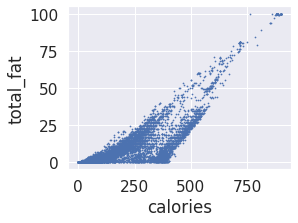

In [122]:
visualize('calories', 'total_fat')

**Calories and cholesterol**

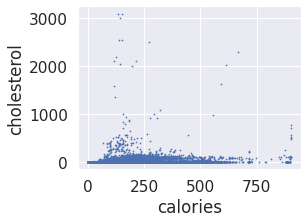

In [123]:
visualize('calories', 'cholesterol')

**Calories and carbohydrate**

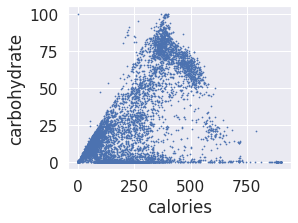

In [124]:
visualize('calories', 'carbohydrate')

**Heatmap for all the featues of this task**

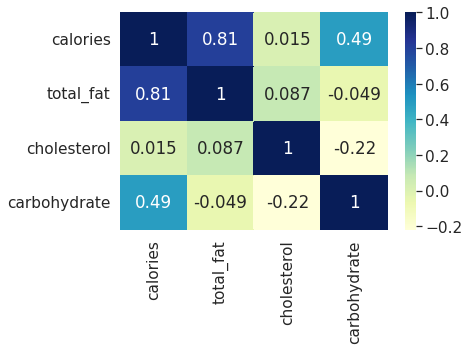

In [125]:
sns.heatmap(data_t1.corr(), annot=True, cmap="YlGnBu")